# **UPPER CONFIDENCE BOUND**

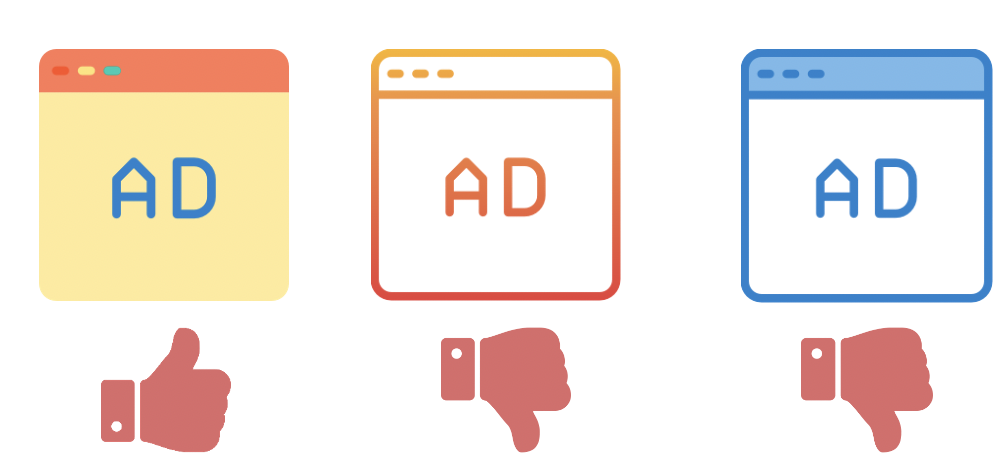

## ***IMPORTING LIBRARIES***

In [1]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")

## ***SUMMARIZING THE DATASET***

In [3]:
print(data.shape)
print(data.head())

(10000, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0


## ***CALCULATING THE UPPER CONFIDENCE BOUND***

In [26]:
import math

observations                    = 10000
no_of_ads                       = 10
total_reward                    = 0

number_of_selection_of_each_ads = [0] * no_of_ads
sum_of_rewards_of_each_ads      = [0] * no_of_ads

ads_selected                    = []

for n in range(0, observations):
  ad              = 0
  max_upper_bound = 0

  for i in range(0, no_of_ads):
    if(number_of_selection_of_each_ads[i] > 0):
      average_reward  = sum_of_rewards_of_each_ads[i] / number_of_selection_of_each_ads[i]  # average reward
      delta_i         = math.sqrt(3/2 * math.log(n+1) / number_of_selection_of_each_ads[i]) # confidence interval
      upper_bound     = average_reward + delta_i                                            # maximum UCB
    else:
      upper_bound     = 1e400

    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad              = i
  ads_selected.append(ad)
  number_of_selection_of_each_ads[ad] = number_of_selection_of_each_ads[ad] + 1
  reward                              = data.values[n, ad]
  sum_of_rewards_of_each_ads[ad]      = sum_of_rewards_of_each_ads[ad] + reward
  total_reward                        = total_reward + reward

print("Rewards by Ads =",sum_of_rewards_of_each_ads)
print("Total Rewards by UCB =",total_reward)
print("Ads Selected at each Round =",ads_selected)

Rewards by Ads = [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total Rewards by UCB = 2178
Ads Selected at each Round = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1

## ***VISUALIZING THE RESULT***

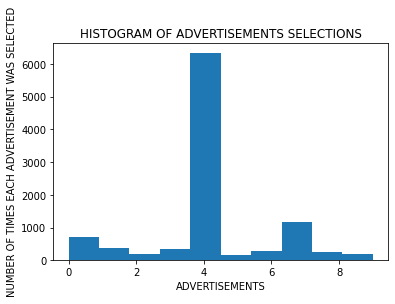

In [31]:
import matplotlib.pyplot as plt

plt.hist(ads_selected)
plt.title("HISTOGRAM OF ADVERTISEMENTS SELECTIONS")
plt.xlabel("ADVERTISEMENTS")
plt.ylabel("NUMBER OF TIMES EACH ADVERTISEMENT WAS SELECTED")
plt.show()